# Cluster Analysis

* Cluster analysis, or data segmentation, is used to break data up into clusters such that those within each cluster are more closely related to one another than objects assigned to different clusters.
* A clustering method attempts to group the objects based on the definition of similarity supplied to it.

## Proximity Matrices

* Sometimes the data is represented directly in terms of the proximity (alikeness or affinity) between pairs of objects. These can be either similarities or dissimilarities (difference or lack of affinity).
* This is stored in a N by N matrix, $\mathbb{D}$, where element (i,j) is the proximity between the ith and jth object.
* This matrix is then the input for the clustering algorithm

## Dissimilarities Based on Attributes

* Let $d_j(x_{ij}, x_{i'j})$ be the dissmilarity between the jth attribute for variables $x_i$ and $x_j$. Note x is in p dimensional space
* Then the dissimilarity between objects i and i' is $$ D(x_i, x_{i'}) = \sum_{j=1}^p d_j(x_{ij}, x_{i'j})$$
* Common measures are:
    1. squared distance: $d_j(x_{ij}, x_{i'j}) = (x_{ij} - x_{i'j})^2$
    2. absolute error
    3. correlation
    4. For ordinal data (i.e. (bad, avarage, good) ), it is typical to replace the vairables with $$ \frac{i-1/2}{M}, i=1,...M$$ For example in the example, M = 3. Then we use the same measures as for quantitative variables
    5. For categorial variables, the degree of difference between pairs of values must be defined

* Overall Dissimilarity is measured as a weighted sum:
$$ D(x_i, x_{i'}) = \sum_{j=1}^p w_j d_j(x_{ij}, x_{i'j});  \sum_{j=1}^p w_j =1 $$
* The average dissimilarity is $$ \bar{D} = \frac{1}{N^2} \sum_{i=1}^N \sum_{i'=1}^N D(x_i, x_{i'}) = \frac{1}{N^2} \sum_{i=1}^N \sum_{i'=1}^N \sum_{j=1}^p w_j d_j(x_{ij}, x_{i'j}) = \frac{1}{N^2} \sum_{j=1}^p w_j \bar{d}_j $$ 
* Hence the relative influence of the jth variable is $w_j*\bar{d}_j$. So setting $w_j = 1 /\bar{d}_j$$ will give all attributes equal influence in characterizing overall dissimilarity between objects.
* Note that it is not always best to use equal weights. Care should be taken in choosing the weights. 

## Clustering Algorithms

* Clustering algorithms fall into three distinct types: combinatorial algorithms, mixture modeling, and mode seeking.
    * Combinatorial algorithms work directly on the observed data with no direct reference to an underlying probability model.
    * Mixture modeling supposes that the data is an i.i.d sample from some population described by a probability density function.
    * Mode seekers (“bump hunters”) take a nonparametric perspective, attempting to directly estimate distinct modes of the probability density function.

### Combinatorial Algorithms 

* Choose the number of clusters K < N. Each cluster is assigned to one cluster
* Let $k=C(i) $ be a encoder that assigns the ith observation to the kth cluster
* Want to find a encoder that minimizes a loss function that measures the clusterin goal. Typically this measure is broken up into two parts:
    1. within cluster, which measures the differences within a cluster
        $$ W(C) = 0.5 \sum_{k=1}^K \sum_{C(i)=k} \sum_{C(i')=k} d(x_i, x_{i'} ) $$
    2. between-cluster measures the distance between clustersx
        $$ B(C) = 0.5 \sum_{k=1}^K \sum_{C(i)\neq k} \sum_{C(i')=k} d(x_i, x_{i'} ) $$
    ** Note that T = W(C) + B(C) is a constant. Thus minimizing W(C) is equivalent to maximizing B(C)
* There are $$ S(N,K) = \frac{1}{K!} \sum_{k=1}^K (-1)^{K-k} \frac{K!}{k!(K-k)!}k^N$$ distinct assignments so this problem is not solveable using brute force.

#### feasible strategies

Feasible strategies are based on iterative greedy descent, and most likely converages to a local optimum

##### K-Means 

* One of the most popular. 
* Dissimilarity is measured using Euclidean distance
* Algorithm works as follows: randomally assingn values to clusters. Then calculate means of clusters, then assign each item to its closes cluster. Then repeaat until the assignments do not change.

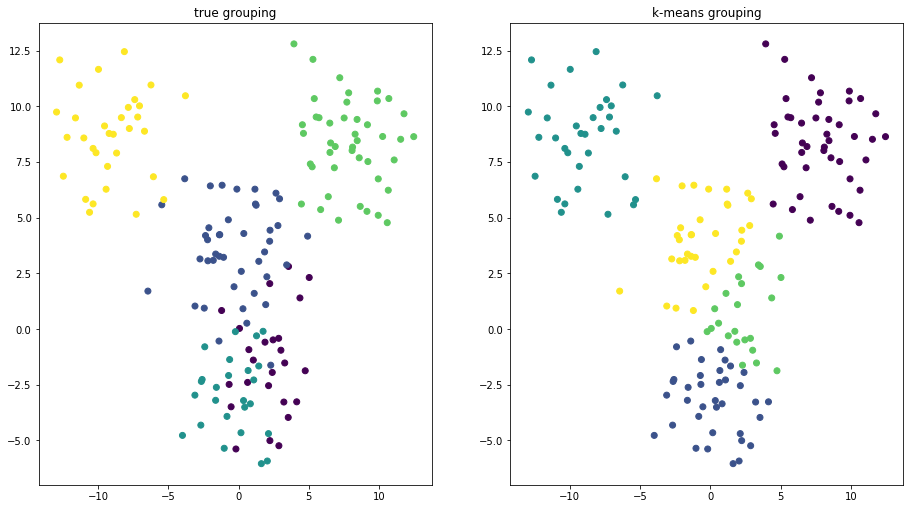

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generateData( numOfGroups ):
    d = pd.DataFrame()
    for i in range(numOfGroups):
        groupSize = np.random.randint(20, 45)
        d = pd.concat( [d, pd.DataFrame( { 'x': np.random.normal( np.random.normal(0, 5, 1), 2.0, groupSize), 'y': np.random.normal( np.random.normal(0, 5, 1), 2.0, groupSize), 'c' : str(i)} ) ] , axis = 0 )
    return d

def kMeans( d, numOfClasses, tol = 5 ):
    oldtotalDist = np.inf
    totalDist = np.inf
    classification = np.random.randint( 1, numOfClasses+1, size  = d.shape[0] )
     
    while( oldtotalDist == np.inf or (oldtotalDist-totalDist) > tol ):
        oldtotalDist = totalDist
        means = d.groupby( [classification] ).mean()
        dist = pd.DataFrame()
        for index, row in means.iterrows():
            dist = pd.concat( [dist, (d.x - row.x)**2 + (d.y - row.y )**2], axis = 1)
        dist.columns = np.arange(1,dist.shape[1]+1)
        totalDist = np.sum( dist.min( axis = 1 ) )
        classification = dist.idxmin(axis = 1 )

    return(  classification )
        
def __main__():
    numOfGroups = 5
    d = generateData( numOfGroups )
    
    f, axes = plt.subplots(1, 2, sharey=False)
    f.set_size_inches(15.5, 8.5)
    axes[0].scatter( x = d.x, y =d.y, c = d.c)
    axes[0].set_title("true grouping")
    
    classification = kMeans( d, 5)
    
    axes[1].scatter( x = d.x, y =d.y, c =classification)
    axes[1].set_title("k-means grouping")
    plt.show()

__main__()
